<a href="https://colab.research.google.com/github/joshuabdixon/Evaluating-Marketing-Campaign-Effectiveness-Using-Non-Parametric-Tests/blob/main/Evaluating_Marketing_Campaign_Effectiveness_Using_Non_Parametric_Tests_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluating Marketing Campaign Effectiveness Using Non-Parametric Tests

## Project Overview
In this project, I conducted an analysis to compare the customer engagement levels of two marketing campaigns, Campaign A and Campaign B, for an online retail brand. The goal was to determine which campaign was more effective at engaging customers by examining the engagement scores provided in the dataset. Due to the non-normal distribution of the data, non-parametric statistical methods were employed to ensure a valid comparison.

## Summary, Rationale and Approach
I began the analysis with exploratory data analysis, including histograms, box plots, density plots, and Q-Q plots, which revealed deviations from normality in the engagement scores for both campaigns. This finding led to the application of the Shapiro-Wilk test, confirming that the data did not follow a normal distribution. Consequently, the Mann-Whitney U test was used to compare the median engagement scores between the independent samples of Campaign A and Campaign B. This approach ensured the statistical validity of the conclusions drawn regarding the relative effectiveness of the two campaigns.

## Recommendations
Based on the Mann-Whitney U test results, which indicated no significant difference in engagement scores between Campaign A and Campaign B, I recommend the following actions:

1. **Resource Allocation:** Given the similar engagement levels, marketing resources could be equally distributed between the two campaigns or allocated to explore new strategies that might enhance overall customer engagement. Alternatively, selecting the most cost-effective campaign would be prudent, given their comparable performance.
2. **Further Analysis:** Investigate customer demographics for each campaign to identify hidden engagement patterns that could inform more targeted marketing strategies.
3. **Campaign Optimisation:** Test different aspects of the campaigns, such as messaging, timing, and digital channels, to refine strategies that could improve engagement outcomes in future campaigns.

# Non-Parametric Test Analysis

## Python Code - Structure
The code used to carry out the analysis has been structured as follows

0. Import Libraries, Data Preparation and Cleaning

1. Exploratory Data Analysis

2. Statistical Testing

3. Results and Discussion

## 0. Import Libraries, Data Preparation and Cleaning

In [ ]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import mannwhitneyu, shapiro

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/marketing_campaign_data.csv')
data.head()


,Campaign,Engagement Score
0,A,59.393215
1,A,74.367043
2,A,64.248704
3,A,59.039486
4,A,48.128932


In [ ]:
# Separate Campaign A and B into two datasets
data_A = data[data['Campaign'] == 'A']
data_B = data[data['Campaign'] == 'B']
data_B.head()

,Campaign,Engagement Score
100,B,65.836240
101,B,35.250598
102,B,70.139552
103,B,87.164141
104,B,33.656486


In [ ]:
# View the metadata
print(data.info())
print() # Space for clarity
print(data_A.info())
print() # Space for clarity
print(data_B.info())

# Campaign A and B dataframes are equal in shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign          200 non-null    object 
 1   Engagement Score  200 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB
None

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign          100 non-null    object 
 1   Engagement Score  100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB
None

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 100 to 199
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign          100 non-null    object 
 1   Engagement Score  100 non-null    float64
dtypes: float64(1

In [ ]:
# Check for missing values
data.isnull().sum()

# There are no missing values - the data is clean.

Campaign            0
Engagement Score    0
dtype: int64

## 1. Exploratory Data Analysis

In [ ]:
# Compute the descriptive statistics
print(data_A.describe())
print() # Space for clarity
print(data_B.describe())


       Engagement Score
count        100.000000
mean          52.551446
std           26.077861
min           10.422593
25%           28.522284
50%           52.073289
75%           71.603493
max           98.953645

       Engagement Score
count        100.000000
mean          54.606132
std           20.857724
min           15.878556
25%           37.169784
50%           58.143097
75%           69.751757
max           89.913525


Interpretation:
- Initial inspection of the data highlights that the mean engagement score for Campaign A is 52.6 and Campaign B is 54.6.
- The standard deviation for Campaign A is 26.1 and Campaign B is 20.9.
- Campaign A has a broder spread than Campaign B, reflected by the standard deviation and interquartile ranges.

### Visual Plots


#### Histograms (Frequency)

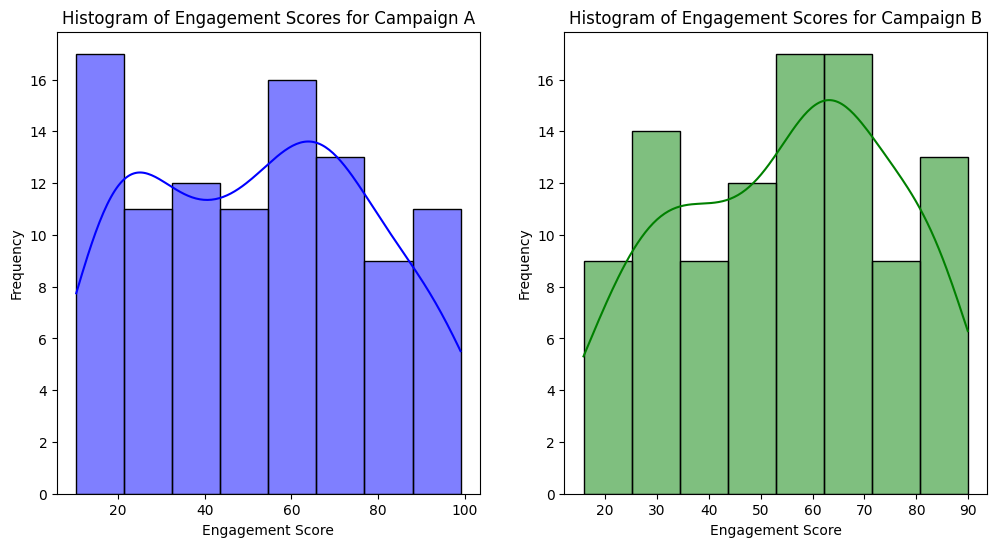

In [ ]:
# Plot the Histograms for Campaign A and Campaign B
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_A['Engagement Score'], kde=True, color='blue')
plt.title('Histogram of Engagement Scores for Campaign A')
plt.xlabel('Engagement Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data_B['Engagement Score'], kde=True, color='green')
plt.title('Histogram of Engagement Scores for Campaign B')
plt.xlabel('Engagement Score')
plt.ylabel('Frequency')
plt.show()


#### Box Plots

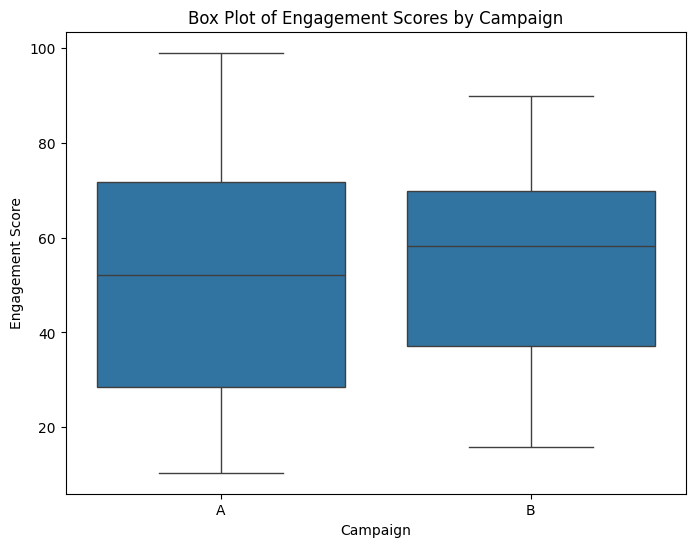

In [ ]:
# Plot the Boxplots for Campaign A and Campaign B
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Campaign', y='Engagement Score')
plt.title('Box Plot of Engagement Scores by Campaign')
plt.xlabel('Campaign')
plt.ylabel('Engagement Score')
plt.show()


#### Density Plots

<ipython-input-88-1e955b699832>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_A['Engagement Score'], label='Campaign A', shade=True, cut=0)
<ipython-input-88-1e955b699832>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_B['Engagement Score'], label='Campaign B', shade=True, cut=0)


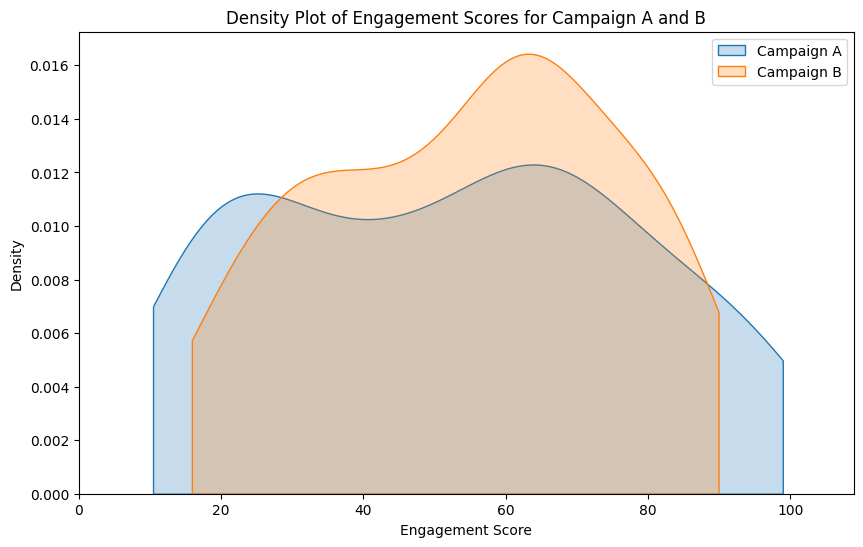

In [ ]:
# Plot the Density Plots for Campaign A and Campaign B
plt.figure(figsize=(10, 6))
sns.kdeplot(data_A['Engagement Score'], label='Campaign A', shade=True, cut=0)
sns.kdeplot(data_B['Engagement Score'], label='Campaign B', shade=True, cut=0)
plt.title('Density Plot of Engagement Scores for Campaign A and B')
plt.xlabel('Engagement Score')
plt.ylabel('Density')
plt.xlim(0, max(data['Engagement Score']) + 10)  # Adjust the x-axis limits to avoid negative values
plt.legend()
plt.show()

#### QQ Plots

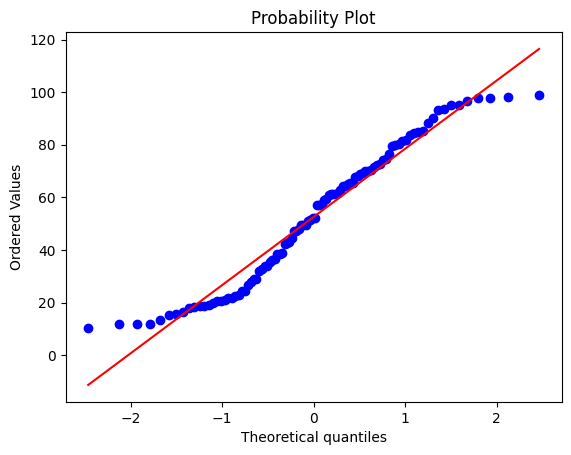

In [ ]:
# Plot a Q-Q plot for Campaign A.
stats.probplot(data_A["Engagement Score"],
               dist="norm",
               plot=plt,)

# View the plot.
plt.show()

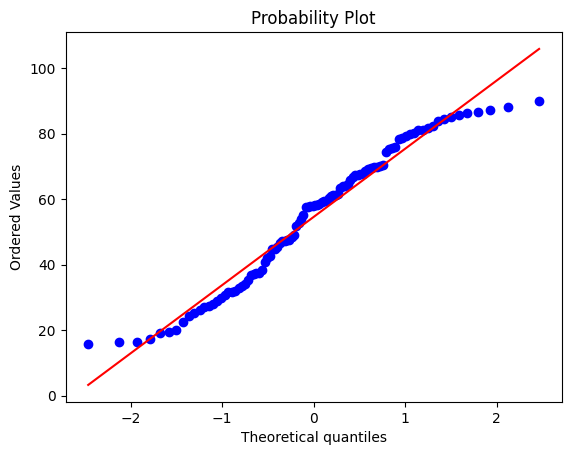

In [ ]:
# Plot a Q-Q plot for Campaign B.
stats.probplot(data_B["Engagement Score"],
               dist="norm",
               plot=plt)

# View the plot.
plt.show()

#### **Interpretation:**

- **Histograms (Frequency):** The histograms for both campaigns suggest that the engagement score distributions do not align with a normal distribution; they appear to be non-normal with possible bimodality, particularly for Campaign A. This observation is key in our decision to consider non-parametric tests.

- **Box Plots:** The box plot for Campaign A displays a wider interquartile range and longer whiskers, indicating greater variability in engagement scores compared to Campaign B. Both box plots do not show signs of outliers, as there are no data points beyond the whiskers that would typically indicate an outlier in such plots.

- **Density Plots:** The density plots for both campaigns highlight the areas where data points are most concentrated. For Campaign A, there are two notable peaks around the scores of approximately 20 and 70, suggesting a bimodal distribution where these two ranges of engagement scores are most prevalent Campaign B has a two peaks, one between 25 and 40 and more pronounced peak between 60 to 80.

- **Q-Q Plots:** The Q-Q plots for each campaign show that the data points significantly deviate from the line at both the lower and upper ends of the distribution, indicating heavy tails. This deviation from the theoretical normal line suggests that the data is not normally distributed.

The key potential issues with the data include bimodal distributions in Campaign A and varied peaks in Campaign B, suggesting inconsistent engagement across different audience segments.

Both campaigns exhibit non-normal distributions, necessitating the use of non-parametric statistical methods rather than parametric ones, which assume normality.

#### **Shapiro-Wilk Test:**

Given the visual indications of non-normal distributions in the engagement scores for both campaigns, it is prudent to conduct the Shapiro-Wilk test. This test will provide a more formal assessment of the normality assumption.

The Shapiro-Wilk test is effective with small to moderate sample sizes, making it suitable for our data set.

## 2. Statistical Testing

### a) Is the data for both campaigns normally distributed? (Shapiro-Wilk Test)

Hypothesis for Shapiro-Wilk Test:

$\alpha=0.05$,
- $H_0$: The data is normally distributed.
- $H_a$: The data is not normally distributed.

In [ ]:
# Perform the Shapiro–Wilk test
stat_A, p_A = shapiro(data_A["Engagement Score"])
stat_B, p_B = shapiro(data_B["Engagement Score"])


print("Campaign A Shapiro-Wilk statistic:", stat_A)
print("Campaign A Shapiro-Wilk p-value:", p_A)
print()
print("Campaign B Shapiro-Wilk statistic:", stat_B)
print("Campaign B Shapiro-Wilk p-value:", p_B)

Campaign A Shapiro-Wilk statistic: 0.9510603547096252
Campaign A Shapiro-Wilk p-value: 0.000974977039732039

Campaign B Shapiro-Wilk statistic: 0.9589545130729675
Campaign B Shapiro-Wilk p-value: 0.0033893724903464317


In [ ]:
# Interpretation.
alpha = 0.05
if p_A > alpha:
    print('Campaign A Engagement Score sample looks normally distributed  (fail to reject H0)')
else:
    print('Campaign A Engagement Score sample does not look normally distributed (reject H0)')
print()
if p_B > alpha:
    print('Campaign B Engagement Score sample looks normally distributed  (fail to reject H0)')
else:
    print('Campaign B Engagement Score sample does not look normally distributed (reject H0)')

Campaign A Engagement Score sample does not look normally distributed (reject H0)

Campaign B Engagement Score sample does not look normally distributed (reject H0)


### b) Is one campaign more effective than the other? (Mann-Whitney U Test)
- The Mann-Whitney U Test will be used to confirm this, as the the samples are independent.

Hypothesis for Mann-Whitney U Test:

$\alpha=0.05$,
- $H_0$: There is no difference in the median engagement scores between Campaign A and Campaign B.
- $H_a$:  There is a difference in the median engagement scores between Campaign A and Campaign B.

In [ ]:
# Perform the Mann–Whitney U test.
mannwhitney_stat, mannwhitney_p = mannwhitneyu(data_A["Engagement Score"],
                                               data_B["Engagement Score"])

# View the output.
print("Mann-Whitney statistic:", mannwhitney_stat)
print("Mann-Whitney p-value:", mannwhitney_p)

Mann-Whitney statistic: 4741.0
Mann-Whitney p-value: 0.5276378110739883


The output indicates the test statistic ($U$) value is 4741. The $p$-value is approximately 0.53. Since the $p$-value is greater than the common alpha ($\alpha$) level of 0.05, we would not reject $H_0$, indicating that there is no significant difference between the two Campaigns based on the provided data.

## 3. Results and Discussion

The statistical tests applied revealed that both campaigns do not differ significantly in their engagement scores, with a Mann-Whitney statistic of 4741 and a p-value of approximately 0.53. This outcome suggests that neither campaign is superior in engaging customers under the current strategies. The engagement patterns, highlighted by the bimodal and slightly skewed distributions in the density plots, suggest variability in how different segments of the target audience respond to each campaign. These insights underline the importance of continuous testing and adjustment in marketing strategies to cater effectively to diverse customer preferences and behaviors.